In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [9]:
np.random.seed(42)
X = np.sort(np.random.rand(100))
y = np.sin(2 * np.pi * X) + np.random.randn(100) * 0.1

X = X[:, np.newaxis]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
poly = PolynomialFeatures(degree=15)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [15]:
# 🎯 Retrain Ridge with best alpha from validation curve
best_alpha = 0.001  # or use whatever alpha worked best for you
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train_poly, y_train)

Ridge(alpha=0.001)

In [17]:
# 🎯 Predict on test set
y_pred_test = ridge_final.predict(X_test_poly)

# 🎯 Compute and print MSE
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"🔍 Ridge Final Model MSE on Test Set: {mse_test:.4f}")

🔍 Ridge Final Model MSE on Test Set: 0.0103


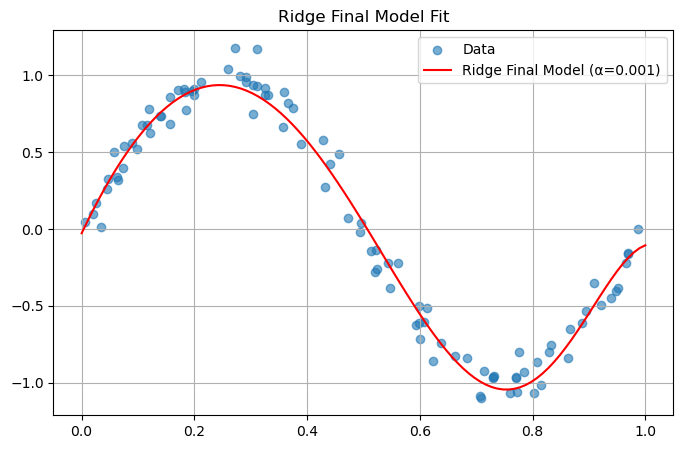

In [21]:
# 🎯 Visualize predictions vs actual
X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = ridge_final.predict(X_plot_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X_plot, y_plot, color="red", label=f"Ridge Final Model (α={best_alpha})")
plt.title("Ridge Final Model Fit")
plt.legend()
plt.grid(True)
plt.show()